# Network Analysis and Community Detection in Social Network Data
#### Prepared by: Jelo Delariarte, Elkan Pagobayan, Lennart Panton, Matmat Romero

Master of Science in Data Science 2021   
Asian Institute of Management

---

*All rights reserved. No part of this document may be reproduced or transmitted in any form or by any means, or stored in any retrieval system of any nature without prior written permission.*

© 2021

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> EXECUTIVE SUMMARY </span></div>

This notebook presents an analysis of social networks originating from the 1600s. Using `python` and `networkx`, the data is reconstructed into a graph then exploratory data analysis was performed on the reconstructed chart to analyze its essential characteristics. The group utilized the Louvain method and agglomerative hierarchical clustering to find specific groups within the community. Based on our findings, the Louvain method showed significantly more clusters than the hierarchical clustering. Lastly, to identify the most influential people on the network, we utilized four centrality measures: degree centrality, closeness centrality, betweenness centrality, and eigenvector centrality, were performed. The resulting centrality measures showed that 5 persons have been consistently influential across all measures: `Erik Cunningham`, `Thomas Ennis`, `Dennis Davis`, `James Howard`, and `Courtney Cullinan`. By examining their historical roles, we observed that they are either highly involved in the community or the religious sector. In this analysis, we showed the potential of using network science in analyzing social structures. Additionally, it shows how network science allows us to build narratives that provide deeper insights to social networks.

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> INTRODUCTION </span></div>

The science of analyzing social network may be attributed to one central concept -- social network analysis studies relationships and how it may (or may not) affect a network. Different factors like age, personality, external aesthetics, ethnicity, among others, affect different peoples' relationships. When these things come into play, it is natural for certain groups of people tend to group up together with whom they have more affinity with, forming clusters and communities within each network. 

Social Networks may also show highly-influential nodes which may be used to track flow of information. This type of insight may shed light on how certain phenomenons may play out like disease spreading and even something as mundane as trying to trace the spread of gossip.

For the given social network data, we analyzed the network by identifying basic statistics and performing exploratory analysis, which allows us to uncover a data story to describe the social network in question.

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> METHODOLOGY </span></div>

This section provides an outline of the analysis methodology performed in this notebook - network visualization, EDA, community detection, computing centrality measures, hypothesis on the potential dynamics of the networks, and conclusion.

#### Network Visualization  
To understand the layout of the network, the topology is mapped via networkx. At the onset, it shows what type of relationships appear and initial conjectures about the network may be conceived just by looking at the initial network visualization.
  
#### Exploratory Data Analysis
Aside from utilizing networkx to check basic statistics on the data, more insights will be gethered via the Pandas library.   

#### Community Detection  
Groupings and clusters based on the relationships appear in social networks, so that fact will be investigated and will be analyzed.

#### Computing Centrality Measures*  
Essentially, centrality is measured in different methods to determine influential nodes in the networks. This is determined to understand the flow of information within the network. 

#### Hypothesis on the Potential Dynamic of the Network  
What type of social network is the dataset being analyzed? This question is the main focus of the said section and a qualitative analysis based on the insights gathered from the different network properties.

#### Conclusion  
A summary of findings and specific recommendations to improve the network is laid out in the conclusion section.


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import community
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance
from collections import defaultdict

from wordcloud import WordCloud, STOPWORDS
sns.set(style="darkgrid", context="talk")

### Loading the Dataset
The social network dataset is initialized via pandas. The dataset pertains to two `.csv` files pertaining to the nodes with their targets and the node properties. 

In [2]:
df_edges = pd.read_csv('social_network_edges.csv')
df_nodes = pd.read_csv('social_network_nodes.csv')

In [3]:
display(df_edges.head())
print("Table 1 -  Nodes with their targets")
display(df_nodes.head())
print("Table 2 -  Node details with properties")

,Source,Target
0,Antonio Rutledge,Daniel Lopez
1,Antonio Rutledge,Jeffrey Jackson
2,Antonio Rutledge,Lieselotte Egan
3,Antonio Rutledge,Eric Hebb
4,Antonio Rutledge,James Cooks


Table 1 -  Nodes with their targets


,Name,Historical Role,Gender,Birth Year,Death Year
0,Robert Tanner,religious writer,male,1663,1731
1,Willie Schlater,local politician and author,male,1621,1694
2,Dan Jimenez,colonial official and scholar,male,1674,1751
3,Particia Turner,Community pastor,female,1656,1659
4,Thomas Boudreau,Community pastor and poet,male,1626,1697


Table 2 -  Node details with properties


### Creating the Network
The dataset with the nodes, targets, and properties are loaded into network `G` via networkx. Afterwards, the nodes' attributes are set to `G` as well. Basic statistics (Fig.1) and an example of a node with its properties (Fig.2) are shown below.

In [4]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df_edges, 'Source', 'Target')

print('Number of people in the network:', len(G.nodes))
print('Links:', G.size())
print('\nFig.1 - Basic Statistics of the Network.')

Number of people in the network: 119
Links: 174

Fig.1 - Basic Statistics of the Network.


In [5]:
attr = df_nodes.set_index('Name').to_dict('index')
nx.set_node_attributes(G, attr)
display(G.nodes['Robert Tanner'])

print('\nFig.2 - 1 Node with Properties')

{'Historical Role': 'religious writer',
 'Gender': 'male',
 'Birth Year': 1663,
 'Death Year': 1731}


Fig.2 - 1 Node with Properties


<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> NETWORK VISUALIZATION </span></div>

The topology of the `G` is shown in this section. Since this is a social network where the flow of information between nodes is not unidirectional, `G` is reconstructed via an undirected graph to simulate interactions (talking, speaking) between the nodes.

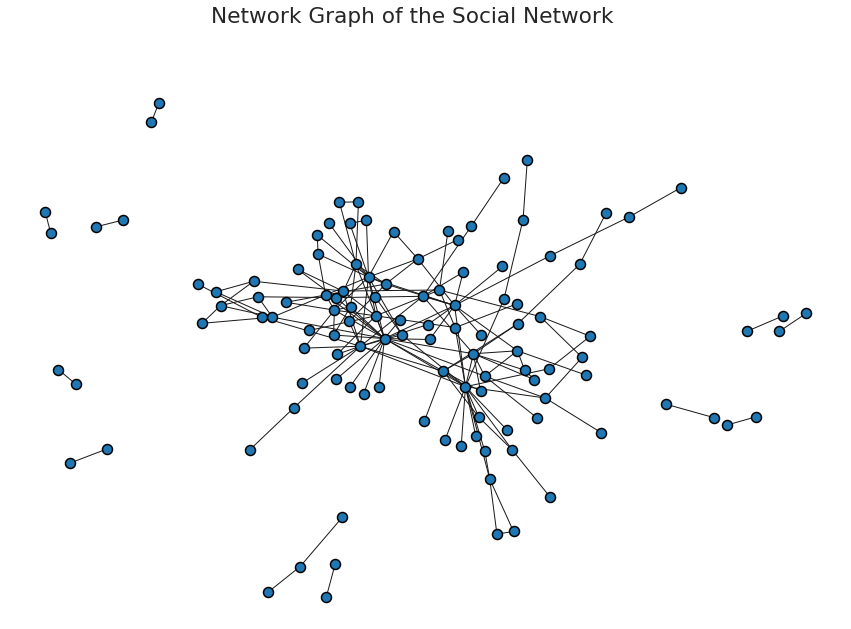

Fig 3 - Graphical Representation of the Social Network


In [6]:
plt.figure(figsize=(15,10))
plt.axis('off')

pos = nx.spring_layout(G, k=0.18)
nx.draw_networkx(G, pos = pos, cmap = plt.cm.RdYlBu, 
                node_size = 100, with_labels = False)

ax = plt.gca()
ax.collections[0].set_edgecolor("black")

plt.suptitle('Network Graph of the Social Network')
plt.show()
print('Fig 3 - Graphical Representation of the Social Network')

Immediately, `G` shows a giant component, while there are a couple of nodes that aren't connected to the giant component. The initial thought is that `G` might be a social network of a congregation of a big group or organization (social club, religious organization, etc) wherein all nodes are members, but not all know each other.

### Visualizing the Giant Component

Giant component is G0 with the following characteristics
Nodes: 96
Number of links: 162


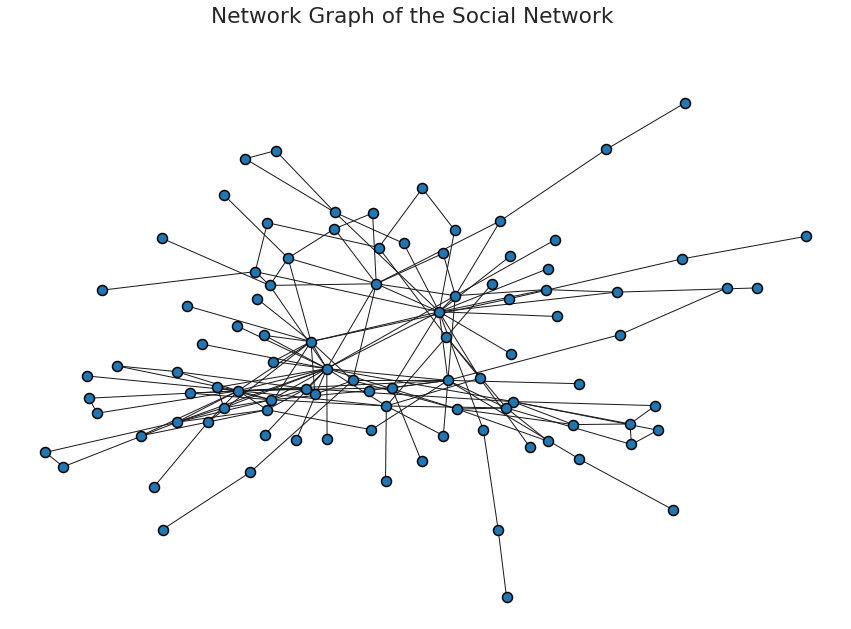

Fig 4 - The Giant Component


In [7]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

print('Giant component is G0 with the following characteristics')
print('Nodes:',len(G0.nodes()))
print('Number of links:', G0.size())


plt.figure(figsize=(15,10))
plt.axis('off')

pos = nx.spring_layout(G0, k=0.18)
nx.draw_networkx(G0, pos = pos, cmap = plt.cm.RdYlBu, 
                node_size = 100, with_labels = False)

ax = plt.gca()
ax.collections[0].set_edgecolor("black")

plt.suptitle('Network Graph of the Social Network')
plt.show()
print('Fig 4 - The Giant Component')

The giant component has at least 96 nodes, and upon closer inpection, there are nodes that appear to be centers of the giant component. These might be the influential people in the group. This will be investigated later via centrality measures.

In [8]:
print (list(nx.connected_components(G)))

[{'David Griffiths', 'Steven Young', 'Everett Wells', 'Jose Moon', 'Ray Stewart', 'Daniel Shiroma', 'Nancy Soucier', 'Krystal Holden', 'Louis Kelly', 'Roger Coty', 'Ruth Hayashi', 'Antonio Rutledge', 'Laverne Rogers', 'Courtney Cullinan', 'Preston Stephens', 'Kevin Jones', 'Morgan Bueno', 'Nathan Howard', 'Tamara Parham', 'Samuel Kleine', 'Joshua Snow', 'Daniel Charlesworth', 'Brian Nelson', 'Jeffrey Jackson', 'Thomas Ennis', 'Bob Mederios', 'Irma Rocker', 'Craig Garris', 'Lisa Crowder', 'Particia Turner', 'Bryan Horan', 'Teresa Pennington', 'John Sasser', 'Juan Thelen', 'Jordan Arnold', 'Jeffry Matthews', 'Thomas Haney', 'Marlin Hopkins', 'Bradford Brown', 'Eric Hebb', 'James Howard', 'Harvey Wilson', 'Leonard Daniels', 'Hector Simpson', 'Brandon Wilson', 'Robert Maxwell', 'Paul Flanigan', 'William Alvarado', 'Robert Guthrie', 'Bryan Schempp', 'Sylvester Wright', 'Gary Hough', 'Ernest Thole', 'Pat Woo', 'Quinton Russo', 'Ronald Kassler', 'James Galea', 'Keith Ryan', 'Robert Harris', '

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> EXPLORATORY DATA ANALYSIS </span></div>

To further gather insights, EDA is performed on the network properties in a graphical manner via univariate analysis. The EDA is performed via the following python codes below.

#### Gender Distribution

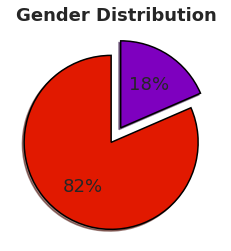

Fig.4 - Distribution of Males and Females in the Dataset


In [9]:
explode = (0.1, 0.1)

plt.pie(df_nodes.Gender.value_counts(), startangle=90, explode = explode,
            wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True,
       colors=['#e11900', '#7e00bf']);
plt.title('Gender Distribution', fontweight='bold')
plt.show();
print('Fig.4 - Distribution of Males and Females in the Dataset')

The dataset contains a significant amount of `male` individuals. If this is a social function, it would make sense that there are more males than females as in the sixteenth century, society favored men, so most women are at home tending to household matters. One such society that exhibited this behavior in the 16th to the 17th century is Europe during the renaissance period. This network then may be gathered from a european community.

#### Age Distribution

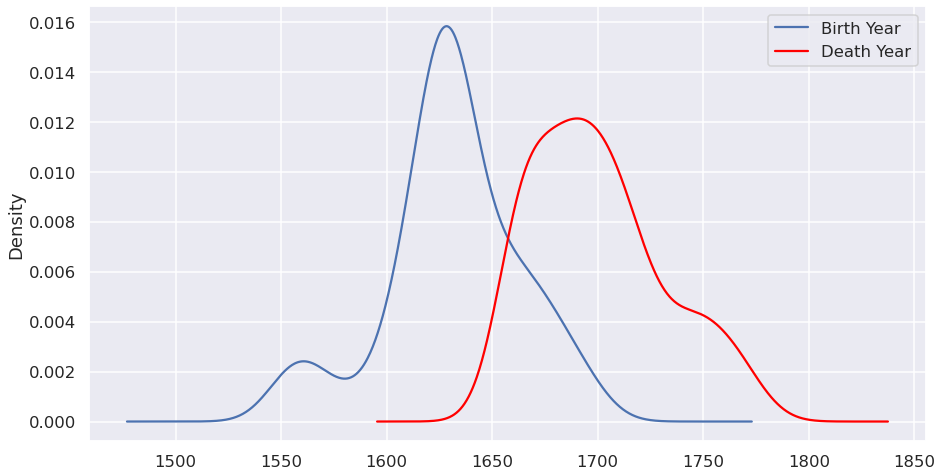

Fig.5 Age Distribution of Nodes in the Dataset


In [10]:
plt.figure(figsize=(15,8))
df_nodes['Birth Year'].plot(kind='kde')
df_nodes['Death Year'].plot(kind='kde', color='red')
plt.legend()
plt.show()
print('Fig.5 Age Distribution of Nodes in the Dataset')

Most nodes were born around the 1600 - 1650's. Given that most year of deaths were around 1670 - 1700's, it can be inferred the nodes are late teens to adults. Age may factor in the relationships formed within the network so this is important to understand. If the dataset is indeed a club/congregation, more nodes of the same age may be closer together.

#### Age Distribution

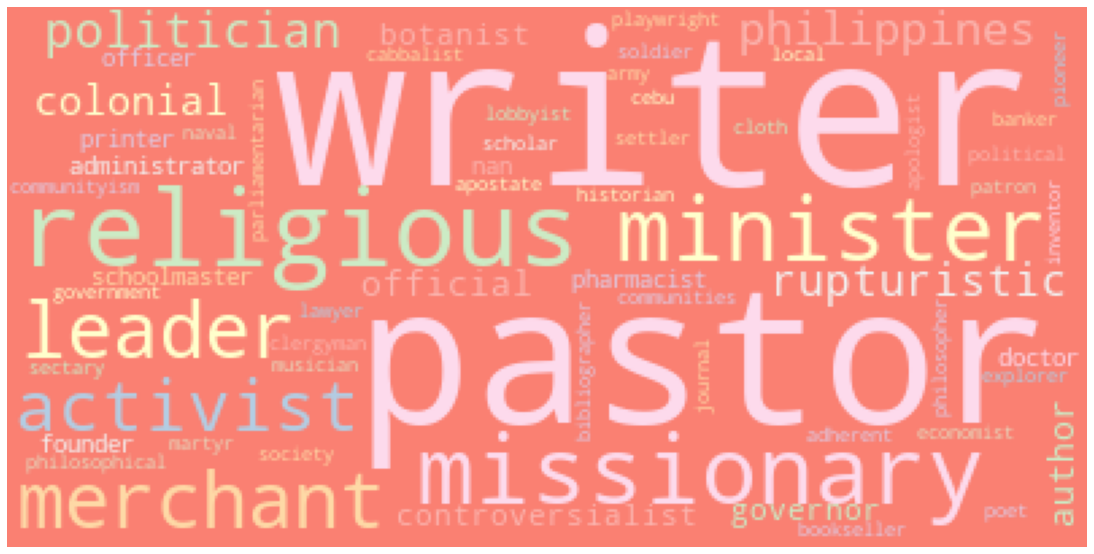

Fig 6. Wordcloud to show most common careers in the dataset


In [11]:
roles = [str(i).lower() for i in df_nodes['Historical Role'].values]

str_roles = ' '.join(roles)        
str_roles = ' '.join([i for i in str_roles.split() if i != 'community'])

plt.figure(figsize = (15, 8), facecolor = None) 
wordcloud = WordCloud(random_state=60, 
                      background_color='salmon', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = None).generate(str_roles)

plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
print('Fig 6. Wordcloud to show most common careers in the dataset')

This wordcloud somehow proves that the network is indeed a religious gathering. However, it wasn't correct to assume that this data is from Europe. The existence of `philippines` and `cebu` may mean that the dataset is of Philippine origin. Since the context is in the 1600's, it can be inferred that the timeframe of this dataset is around the Spanish Inquisition of the Philippines.

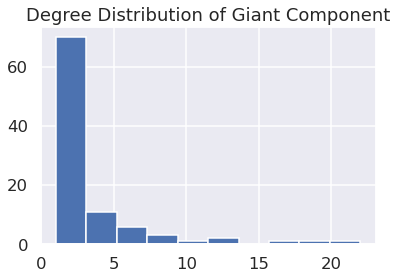

Average clustering coefficient: 0.2812538139284463
Characteristic Path Length: 3.3789473684210525


In [12]:
#Degree Distribution of Giant Component
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title('Degree Distribution of Giant Component')
    plt.show()

plot_degree_dist(G0)

#Clustering Coefficient
cc = nx.clustering(G0)
avg_clust = sum(cc.values()) / len(cc)
print('Average clustering coefficient:', avg_clust)

#Characteristic Path Length
print('Characteristic Path Length:', nx.average_shortest_path_length(G0))

Degree distribution shows a power law distribution where most of the members of the giant component has a small amount of connection, while a few of the nodes have a significantly larger amount of nodes connected to them. The giant component also has a low clustering coefficient, which means that there are weak ties within the social network. Lastly, the characteristic path length is relatively low, which would indicate that one person can easily reach another. In this case, the hubs are highly influential due to their power to connect one person to another despite having weak ties within the network.

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> COMMUNITY DETECTION </span></div>

To detect communities in the dataset, modularity-based community detection and hierarchical clustering will be performed to check if the communities detected are constant across all methods, proving what and where the communities are.

### Louvain Method

The Louvain Method is a modularity based algorithm of detecting communities which quantifies how good a partition is given by:

\begin{equation}
M_c = \sum _{c=1} ^{n_c} \left[ \frac{L_c}{L} - \left (\frac{k_c}{2L} \right)^2\right]
\end{equation}
   
    where  𝑛𝑐  is the number of communities,  𝐿𝑐  is the number of links within the community,  𝑘𝑐  is the total degree of     nodes belonging to the community, and  𝐿  is the total number of links in the network

The Louvain Method is currently implemented in the `community` library. Shown below are the codes to determine communities via Louvain Method.


In [13]:
def louvain():
    partition = community.best_partition(G)
    values = [partition.get(node) for node in G.nodes()]

    plt.figure(figsize=(15,10))
    plt.axis('off')

    pos = nx.spring_layout(G, k=0.18)
    g = nx.draw_networkx(G, pos = pos, cmap = plt.cm.RdYlBu, node_color = values,
                     node_size = 100, with_labels = False)

    ax = plt.gca()
    ax.collections[0].set_edgecolor("black")

    plt.suptitle('Louvain Partitions')
    plt.show()
    print(set(partition.values()))
    print('Fig 7 - Louvain Partition')

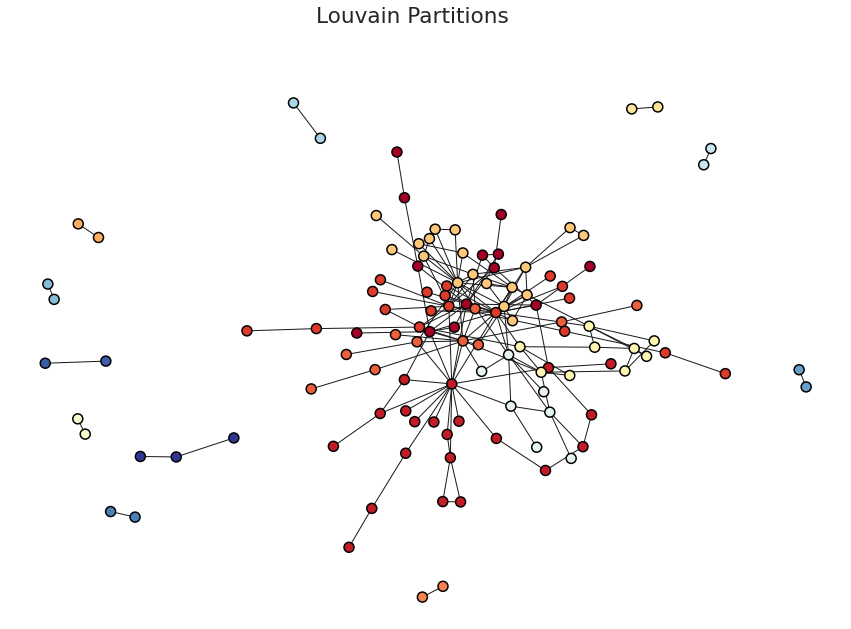

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
Fig 7 - Louvain Partition


In [14]:
louvain()

### Hierarchical Clustering
In taking into account distances between nodes, nodes are clustered via hierarchical clustering based on how close nodes are. Shown here are the codes used to hierarchially cluster the network and dendogram to better visualize the clusters.

In [15]:
def create_hc(G, t):
    ## Set-up the distance matrix D
    labels = G.nodes()    # keep node labels
    path_length = nx.all_pairs_shortest_path_length(G)
    distances=np.zeros((len(G),len(G)))

    '''
    for u,p in path_length.items():
        for v,d in p.items():
            distances[G.nodes().index(u)][G.nodes().index(v)] = d
            distances[G.nodes().index(v)][G.nodes().index(u)] = d
            if u==v: distances[G.nodes().index(u)][G.nodes().index(u)]=0
    '''

    for node, info in path_length:
        for other_node, l in info.items():
            distances[node][other_node] = l
            distances[other_node][node] = l
            if node==other_node: distances[node][node]=0
    Y = distance.squareform(distances)
    Z = hierarchy.average(Y)

    # This partition selection (t) is arbitrary, for illustrive purposes
    membership=list(hierarchy.fcluster(Z,t=t))

    # Create collection of lists for blockmodel
    partition = defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        #partition[p].append(labels[n])
        partition[p].append(n)

    return Z, membership, partition

In [16]:
def hc():
    names = df_nodes.Name.unique()
    name_id = {name:index for name, index in zip(names, range(len(names)))}

    df_mapped_edges = pd.DataFrame(columns=['Source', 'Target'])

    df_mapped_edges['Source'] = df_edges.Source.map(name_id)
    df_mapped_edges['Target'] = df_edges.Target.map(name_id)

    K = nx.from_pandas_edgelist(df_mapped_edges, 'Source', 'Target')

    Z, membership, partition = create_hc(K, t=1.15) 

    partition = {}
    i = 0
    for i in range(len(membership)):
        partition[i]=membership[i]

    plt.figure(figsize=(15,10))
    plt.axis('off')
    pos = nx.spring_layout(K, k=0.2)
    nx.draw_networkx_nodes(K, 
                           pos, 
                           cmap=plt.cm.RdYlBu, 
                           node_color=list(partition.values()))
    nx.draw_networkx_edges(K, pos, alpha=0.5)
    nx.draw_networkx_labels(K, pos, font_size = 10)

    ax = plt.gca()
    ax.collections[0].set_edgecolor("black")

    plt.suptitle('Hierarchical Clustering')
    plt.show()
    print('Fig 8 - Hierarchical Clustering Partitions')
    
    plt.figure(figsize=(20,8))
    hierarchy.dendrogram(Z)
    plt.show()
    print('Fig 9 - Dendogram Partitions')

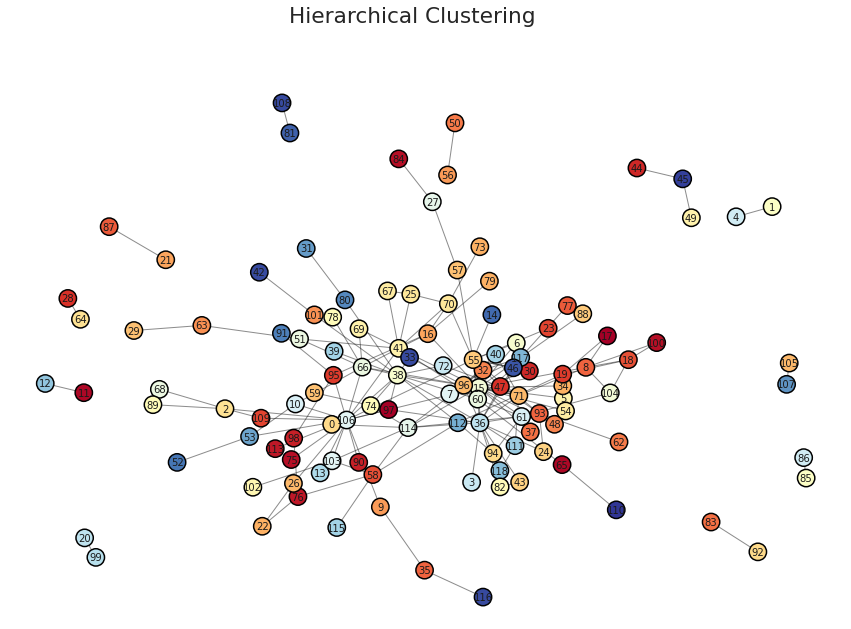

Fig 8 - Hierarchical Clustering Partitions


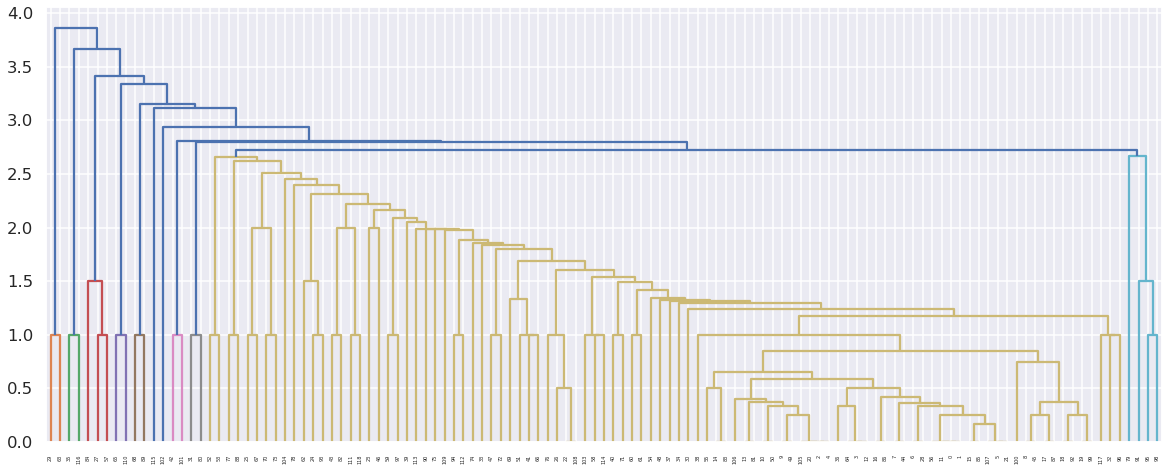

Fig 9 - Dendogram Partitions


In [17]:
hc()

One main difference between the two methods is the number of groupings. In Louvain, there are at least 18 groups, while the hierarchical clustering returned at least 10 clusters. However, both methods took into account the existence of the giant network and the appearance of centers. Centrality will be checked in the next section.

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> CENTRALITY MEASURES </span></div>

Based on the results of the analysis, there are at least 5 people that remain consistently at the top across all the centrality measures. This highly suggests that these 5 people are the central nodes, or the nodes that have a high influence within the network.

In [18]:
df_nodes['degree'] = list(nx.degree_centrality(G).values())
df_nodes['closeness'] = list(nx.closeness_centrality(G).values())
df_nodes['betweenness'] = list(nx.betweenness_centrality(G).values())
df_nodes['eigenvector'] = list(nx.eigenvector_centrality(G).values())

In [19]:
centralities = df_nodes.iloc[:, 5:].T.values

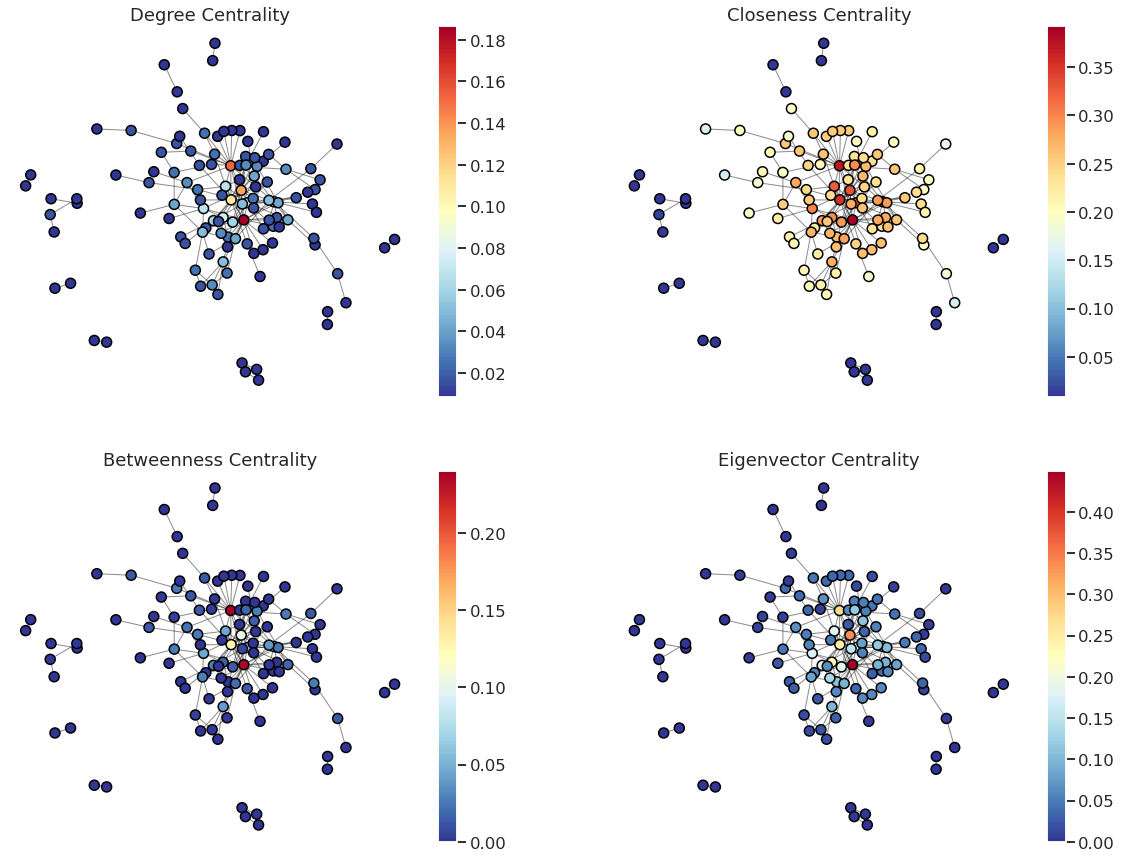

Fig.10 - Centrality Measures for `G`


In [20]:
fig = plt.figure(figsize=(20,15));

titles = ['Degree Centrality', 'Closeness Centrality', 
          'Betweenness Centrality', 'Eigenvector Centrality']

pos = nx.spring_layout(G, k=0.18)

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1);
    nc = nx.draw_networkx_nodes(G, pos, 
                            node_size=100, cmap=plt.cm.RdYlBu_r,
                            node_color=centralities[i]);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title(titles[i]);
    plt.axis('off');
    plt.colorbar(nc);
    
    ax = plt.gca()
    ax.collections[0].set_edgecolor("black")

plt.show()
print('Fig.10 - Centrality Measures for `G`')

In [21]:
display(df_nodes[['Name', 'degree']]
        .sort_values('degree', ascending=False).head(10))
print('Table 3 - Top 10 nodes with high degree centrality in `G`')

,Name,degree
6,Erik Cunningham,0.186441
5,Dennis Davis,0.152542
19,Thomas Ennis,0.135593
40,James Howard,0.110169
7,Courtney Cullinan,0.110169
2,Dan Jimenez,0.084746
22,Roger Coty,0.076271
0,Robert Tanner,0.067797
15,Everett Wells,0.067797
48,Christopher Cruz,0.059322


Table 3 - Top 10 nodes with high degree centrality in `G`


In [22]:
display(df_nodes[['Name', 'closeness']]
        .sort_values('closeness', ascending=False).head(10))
print('Table 4 - Top 10 nodes with high closeness centrality in `G`')

,Name,closeness
6,Erik Cunningham,0.392221
5,Dennis Davis,0.373088
7,Courtney Cullinan,0.354088
40,James Howard,0.338421
19,Thomas Ennis,0.331095
0,Robert Tanner,0.325460
2,Dan Jimenez,0.321357
15,Everett Wells,0.302305
22,Roger Coty,0.297599
63,Jordan Arnold,0.297599


Table 4 - Top 10 nodes with high closeness centrality in `G`


In [23]:
display(df_nodes[['Name', 'betweenness']]
        .sort_values('betweenness', ascending=False).head(10))
print('Table 5 - Top 10 nodes with high betweenness centrality in `G`')

,Name,betweenness
5,Dennis Davis,0.239995
6,Erik Cunningham,0.236833
7,Courtney Cullinan,0.126320
40,James Howard,0.121068
19,Thomas Ennis,0.104460
2,Dan Jimenez,0.064196
15,Everett Wells,0.046191
0,Robert Tanner,0.045007
24,Bradford Brown,0.041649
56,George Ziemba,0.038937


Table 5 - Top 10 nodes with high betweenness centrality in `G`


In [24]:
display(df_nodes[['Name', 'eigenvector']]
        .sort_values('eigenvector', ascending=False).head(10))

print('Table 6 - Top 10 nodes with high eigenvector centrality in `G`')

,Name,eigenvector
6,Erik Cunningham,0.449175
19,Thomas Ennis,0.335297
5,Dennis Davis,0.270322
40,James Howard,0.253171
7,Courtney Cullinan,0.249746
22,Roger Coty,0.231474
26,Ernest Thole,0.190954
2,Dan Jimenez,0.187852
48,Christopher Cruz,0.184969
0,Robert Tanner,0.183847


Table 6 - Top 10 nodes with high eigenvector centrality in `G`


Across all centrality measures, `Erik Cunningham`, `Thomas Ennis`, `Dennis Davis`, `James Howard`, and `Courtney Cullinan` are consistently in the top 5. With this, we can extract their properties to explain what their influence is to the network.

In [25]:
df_nodes.sort_values('degree', ascending=False).head()

,Name,Historical Role,Gender,Birth Year,Death Year,degree,closeness,betweenness,eigenvector
6,Erik Cunningham,Community pastor and writer,male,1630,1691,0.186441,0.392221,0.236833,0.449175
5,Dennis Davis,religious writer,male,1630,1713,0.152542,0.373088,0.239995,0.270322
19,Thomas Ennis,Community pastor and writer,male,1640,1708,0.135593,0.331095,0.104460,0.335297
40,James Howard,Community leader and writer,male,1628,1711,0.110169,0.338421,0.121068,0.253171
7,Courtney Cullinan,Community activist,male,1621,1688,0.110169,0.354088,0.126320,0.249746


`Erik`, `Dennis`, and `Thomas` have undertaken somewhat of a religious role, while `James` and `Courtney` are involved with the community. 

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> NETWORK DYNAMICS </span></div>

Based on the findings, it can be inferred that the network appears to be a social network of a religious congregation or event. As the central nodes are pastors or has a role in line with being a religious, there must be a religious teaching or sermon happening at the time. 

The influence of the top nodes are shown in the community detection methods, especially in the Louvain Method. The best guess is that in the central group is where the pastors are. The pastors have their own followers, indicated by the colors in the Louvain Network (Fig.7). On the other hand, the unconnected nodes to the giant component are mainly influenced by the activists. They are not connected to the giant component because they oppose the religious teachings and may have opted not to join.

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> CONCLUSION </span></div>

We have seen that the giant component has at least 96 nodes. Somes nodes appear to be hubs that has a high number of connections, which are intuitively the most influential people in the components. Also, we observed that most people in the component are late teens to adults based on their year of birth and deaths. This information can be used to have an insight on the kind of relationships formed in the network depending on what age groups interacts the most together. Based on the high frequency words in the wordcloud such as 'Pastor', 'missionary', and 'religious', we identified that the network is a form of religous gathering. Additionally, words such as 'Philippines', 'army', 'colonial' also being included in the wordcloud indicated that this network represents a social networkin the Philippines during the the Spanish Inquisition of the Philippines during the 1600's. 

We also conclude that there are 5 people who are central nodes, which have a high influence within the network since these central nodes are consistently at the top of all the centrality measures. Given that the network represents a religious event set during the Spanish Inquisition of the Philippines, we conclude that one of these central nodes should be a pastor or someone who has high relgious authority in the event. Given this, we infer that the event happening the network should be a religious teaching or preaching to the Filipino people.

Lastly, the influence of the top nodes can be seen in the Louvain Method, where the central group is headed by the pastors and the nodes connected to them are the followers as indicated by the Louvain network. Additionally, given this scenario, we conclude that the nodes separate from the giant component are the activists people who oppose this kind of religous teachings that the pastors are trying to impose on the Filipino people.

<div><span style="background-color: skyblue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> REFERENCES </span></div>


- Daybell, James. “Gender, Obedience, and Authority in Sixteenth-Century Women's Letters.” The Sixteenth Century Journal, vol. 41, no. 1, 2010, pp. 49–67. JSTOR, www.jstor.org/stable/27867637. Accessed 16 Apr. 2021.
- Richards, Penny, and Jessica Munns. Gender, Power and Privilege in Early Modern Europe: 1500-1700. Routledge, 2014.

- Legara, Erika Fille. "Community Detection." Network Science Lectures. GitHub repository. 2021.